In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

coordinates = list(lat_lngs)

In [2]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [58]:
import requests
from config import weather_api_key


url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
city_url = url + "&q=" + "Taipei"
city_weather = requests.get(city_url)
print(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=70ee7dfef072aa60df9ae7f2208d4746&q=Taipei
City Weather found.


In [56]:
city_weather = requests.get(city_url)
#city_weather
#city_weather.text
city_weather.json()
print(city_weather.json)
boston_data = city_weather.json()
boston_data["sys"]["country"]

lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

NameError: name 'city_url' is not defined

In [5]:
# Import the datetime module from the datetime library.
from datetime import datetime
import time
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-11-03 10:08:56'

In [6]:
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kaitangata
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | panalingaan
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | saint george
Processing Record 6 of Set 1 | abu kamal
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | pevek
Processing Record 9 of Set 1 | nikolskoye
Processing Record 10 of Set 1 | haines junction
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | kruisfontein
Processing Record 13 of Set 1 | tasiilaq
Processing Record 14 of Set 1 | lorengau
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | taburi
City not found. Skipping...
Processing Record 21 of Set 1 | falmouth
Proc

Processing Record 35 of Set 4 | vardo
Processing Record 36 of Set 4 | san patricio
Processing Record 37 of Set 4 | barrow
Processing Record 38 of Set 4 | mayumba
Processing Record 39 of Set 4 | hami
Processing Record 40 of Set 4 | havelock
Processing Record 41 of Set 4 | iquique
Processing Record 42 of Set 4 | yuxia
Processing Record 43 of Set 4 | ostrovnoy
Processing Record 44 of Set 4 | vila velha
Processing Record 45 of Set 4 | traralgon
Processing Record 46 of Set 4 | saint anthony
Processing Record 47 of Set 4 | guerrero negro
Processing Record 48 of Set 4 | siljan
Processing Record 49 of Set 4 | maraba
Processing Record 50 of Set 4 | uchana
Processing Record 1 of Set 5 | lingyuan
Processing Record 2 of Set 5 | port lincoln
Processing Record 3 of Set 5 | mahuva
Processing Record 4 of Set 5 | okhotsk
Processing Record 5 of Set 5 | merauke
Processing Record 6 of Set 5 | pemangkat
Processing Record 7 of Set 5 | birobidzhan
Processing Record 8 of Set 5 | mama
Processing Record 9 of Se

Processing Record 27 of Set 8 | maniitsoq
Processing Record 28 of Set 8 | victoria
Processing Record 29 of Set 8 | marfino
Processing Record 30 of Set 8 | aklavik
Processing Record 31 of Set 8 | petropavlovka
Processing Record 32 of Set 8 | mancio lima
Processing Record 33 of Set 8 | karkaralinsk
City not found. Skipping...
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | rudnogorsk
Processing Record 36 of Set 8 | umm kaddadah
Processing Record 37 of Set 8 | male
Processing Record 38 of Set 8 | yinchuan
Processing Record 39 of Set 8 | halalo
City not found. Skipping...
Processing Record 40 of Set 8 | jumla
Processing Record 41 of Set 8 | nagornskiy
Processing Record 42 of Set 8 | pauini
Processing Record 43 of Set 8 | yumen
Processing Record 44 of Set 8 | tiznit
Processing Record 45 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 46 of Set 8 | dauphin
Processing Record 47 of Set 8 | emilio carranza
Processing Record 48 of Set 8 | eganville
Proces

Processing Record 12 of Set 12 | karaul
City not found. Skipping...
Processing Record 13 of Set 12 | bajna
Processing Record 14 of Set 12 | udachnyy
Processing Record 15 of Set 12 | saint-georges
Processing Record 16 of Set 12 | tumkur
Processing Record 17 of Set 12 | arcoverde
Processing Record 18 of Set 12 | padang
Processing Record 19 of Set 12 | san diego de los banos
Processing Record 20 of Set 12 | pacific grove
Processing Record 21 of Set 12 | longyearbyen
Processing Record 22 of Set 12 | severo-yeniseyskiy
Processing Record 23 of Set 12 | plettenberg bay
Processing Record 24 of Set 12 | surskoye
Processing Record 25 of Set 12 | kurilsk
Processing Record 26 of Set 12 | tawau
Processing Record 27 of Set 12 | kushima
Processing Record 28 of Set 12 | oni
Processing Record 29 of Set 12 | shihezi
Processing Record 30 of Set 12 | caohai
Processing Record 31 of Set 12 | rio grande
Processing Record 32 of Set 12 | lakes entrance
Processing Record 33 of Set 12 | krasnoarmeysk
Processing 

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [9]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

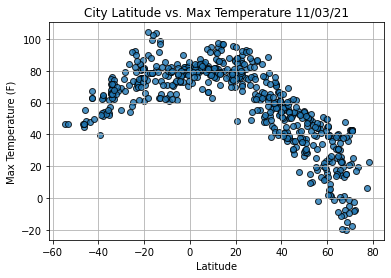

In [12]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

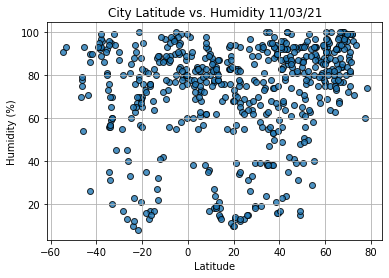

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

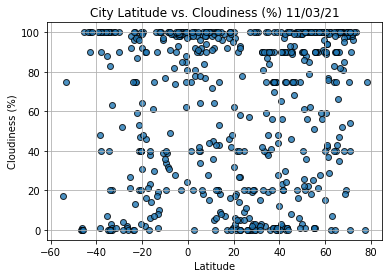

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

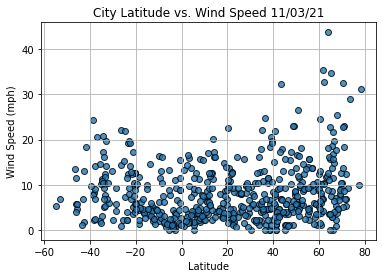

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Panalingaan,8.7842,117.4231,77.07,92,100,7.65,PH,2021-11-03 10:16:23
3,Saint George,37.1041,-113.5841,59.34,53,1,4.61,US,2021-11-03 10:15:46
4,Abu Kamal,34.4506,40.9171,78.87,38,39,12.86,SY,2021-11-03 10:16:24
6,Pevek,69.7008,170.3133,-4.97,93,100,9.31,RU,2021-11-03 10:16:24
7,Nikolskoye,59.7035,30.7861,44.87,77,100,9.73,RU,2021-11-03 10:16:25
...,...,...,...,...,...,...,...,...,...
153,Taft,31.7471,54.2088,76.95,19,3,2.30,IR,2021-11-03 10:20:32
154,Sinj,43.7036,16.6394,61.03,85,100,17.85,HR,2021-11-03 10:20:32
155,San Policarpo,12.1791,125.5072,81.28,84,100,7.74,PH,2021-11-03 10:20:33
156,Turukhansk,65.8167,87.9833,-11.47,98,47,2.86,RU,2021-11-03 10:20:33


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

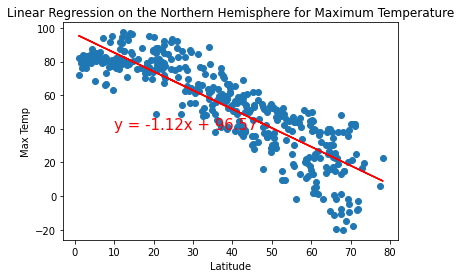

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

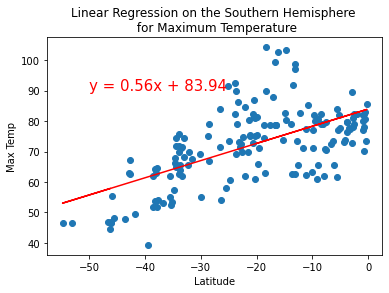

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

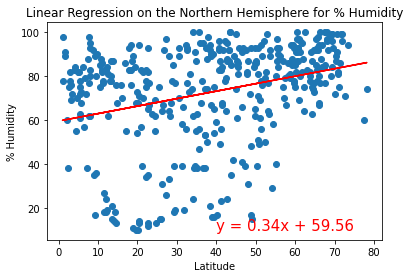

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

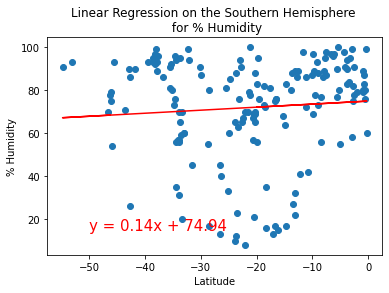

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

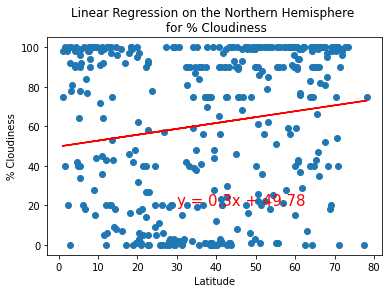

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(30,20))

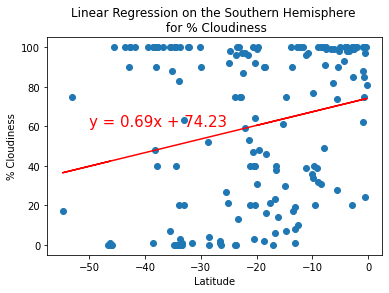

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

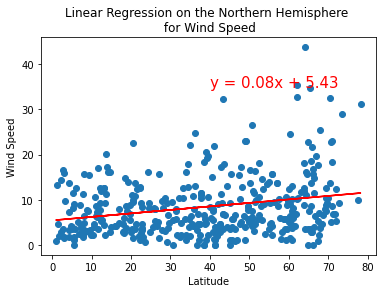

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

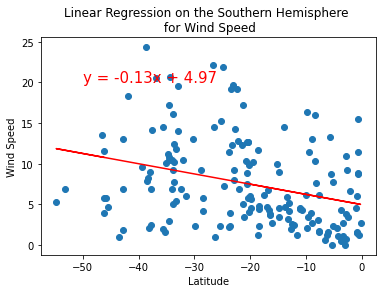

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,20))

In [35]:
import pandas as pd
import gmaps
import requests
# Import the API key.
from config import g_key

city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()
#city_data_df.dtypes



,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Kaitangata,-46.2817,169.8464,44.64,78,1,11.52,NZ,2021-11-03 10:16:22
1,1,Ushuaia,-54.8000,-68.3000,46.53,91,17,5.30,AR,2021-11-03 10:12:28
2,2,Panalingaan,8.7842,117.4231,77.07,92,100,7.65,PH,2021-11-03 10:16:23
3,3,Saint George,37.1041,-113.5841,59.34,53,1,4.61,US,2021-11-03 10:15:46
4,4,Abu Kamal,34.4506,40.9171,78.87,38,39,12.86,SY,2021-11-03 10:16:24


In [25]:
gmaps.configure(api_key=g_key)

max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))

In [30]:

locations = city_data_df[["Lat", "Lng"]]
max_temp = city_data_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp], dissipating=False, max_intensity=300, point_radius=4)
fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [34]:
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)
fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [33]:
locations = city_data_df[["Lat", "Lng"]]
clouds = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=clouds, dissipating=False, max_intensity=300, point_radius=4)
fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [36]:
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=wind, dissipating=False, max_intensity=300, point_radius=4)
fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [48]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 50
What is the maximum temperature you would like for your trip? 80


In [49]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)
preferred_cities_df.count()
#if there are null values, use dropna()

City_ID       262
City          262
Lat           262
Lng           262
Max Temp      262
Humidity      262
Cloudiness    262
Wind Speed    262
Country       260
Date          262
dtype: int64

In [50]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
2,Panalingaan,PH,77.07,8.7842,117.4231,
3,Saint George,US,59.34,37.1041,-113.5841,
4,Abu Kamal,SY,78.87,34.4506,40.9171,
5,Cape Town,ZA,69.89,-33.9258,18.4232,
9,Busselton,AU,64.04,-33.6500,115.3333,
10,Kruisfontein,ZA,75.88,-34.0033,24.7314,
13,Rikitea,PF,73.11,-23.1203,-134.9692,
14,Ribeira Grande,PT,66.60,38.5167,-28.7000,
15,Bredasdorp,ZA,74.52,-34.5322,20.0403,
17,Vaini,TO,75.36,-21.2000,-175.2000,


In [51]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}

for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    # Grab the first hotel from the results and store the name.
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except (IndexError):
        print("Hotel not found... skipping.")
        
    hotel_df.head(10)

Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.


In [53]:
# Add a heatmap of temperature for the vacation spots.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, dissipating=False,
             max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)


# Call the figure to plot the data.
fig


Figure(layout=FigureLayout(height='420px'))

In [ ]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""

In [54]:
# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

In [55]:
# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))